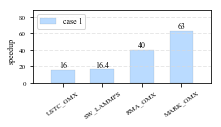

In [2]:
#! /usr/bin/env python# -*- coding: utf-8 -*-
import sys 
reload(sys) 
sys.setdefaultencoding('utf8')
"""
绘制加速比柱状图
Author：shaomingshan
Input：
    version：需要对比的版本
    time：   对应版本的时间
"""


import matplotlib.pyplot as plt
import numpy as np


speedup = [16, 16.4, 40, 63]
version = ['USTC_GMX', 'SW_LAMMPS', 'RMA_GMX', 'MARK_GMX']
rotation = 35

margin_top = 25
margin_right = 1.5
text_gap = 10
# width, height = 3.5, 2.3  # inch
width, height = 3.3, 1.8  # inch
title = u''
xlabel = u''
ylabel = u'speedup'
bar_width = 1.2
text_size = 8
font_size = 8
legend1 = 'case 1'

color11 = '#d0beda'  # 紫
color21 = '#9fbfdf'  # 蓝
color31 = '#d9d9d9'  # 灰
color41 = '#b3e5cc'  # 绿

color1 = '#b3d8ff'
# color1 = '#b3e5cc'
grid_color = '#d9d9d9'
text_color = '#000000'

linewidth = 0.1
edgecolor = "#4d4d4d"


def get_max(data):
    max_num = float('-inf')
    for i in data:
        max_num = i if i > max_num else max_num
    return max_num


def get_min(data):
    min_num = float('inf')
    for i in data:
        min_num = i if i < min_num else min_num
    return min_num


def get_speedup(my_time):
    my_speedup = [0] * len(my_time)
    for i in range(len(my_time)):
        my_speedup[i] = my_time[0] / my_time[i]
    return my_speedup


def log2(my_speedup):
    return np.log2(my_speedup)


def draw(save_path):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

    plt.figure().set_size_inches(width, height)
    # plt.subplots_adjust(left=0.15, bottom=0.15)
    plt.subplots_adjust(left=0.15, bottom=0.32)

    left = np.arange(len(version))*2
    plt.bar(left, speedup, width=bar_width, color=color1, alpha=0.9,
            label=legend1, edgecolor=edgecolor, linewidth=linewidth)

    for x, y in zip(left, speedup):
        plt.text(x, y+text_gap, y, ha='center', va='top', fontsize=text_size, color=text_color)

    plt.title(title)
    # plt.ylabel(ylabel)

    # y label
    plt.text(-2.6, (get_max(speedup) + get_min(speedup) - 0.5) / 2,
             ylabel, ha='center', va='center', fontsize=text_size, rotation=90)

    plt.grid(axis='y', linestyle='--', linewidth=1, c=grid_color, alpha=0.6, zorder=-10)
    # plt.legend(loc='upper left', fontsize=font_size, borderpad=0.35, borderaxespad=0.4,
    #            handlelength=1.7, handleheight=0.6, handletextpad=0.35)
    plt.legend(loc='upper left', fontsize=font_size)
    plt.ylim(0, get_max(speedup) + margin_top)
    plt.xlim(0 - margin_right, max(left) + margin_right)

    plt.xticks(left, version, rotation=rotation)
    plt.tick_params(labelsize=text_size-1)

    # Save fig before show()
    plt.savefig(save_path)
    plt.show()


if __name__ == '__main__':
    file = 'strategy_speedup.pdf'
    draw(file)
